In [32]:
import pandas  as  pd 
import seaborn as sns 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
from matplotlib.pyplot import figure


import the data 

In [33]:
df= pd.read_csv(r"C:\Users\asuss\Desktop\movies.csv")
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


check if there is any data missing 

In [34]:
for column in df.columns:
    missing_data = np.mean(df[column].isnull())
    print('{}-{}%'.format(column,missing_data))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [35]:
df.dtypes # check my data typies in my data frame

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [36]:
df['year_correct'] = df['released'].astype('str').str[8:13] 
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [37]:
df=df.dropna() # drop nan to avoid the error 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

#df['budget'] = pd.to_numeric(df['budget'],  errors='coerce')
#df['gross'] = pd.to_numeric(df['gross'],  errors='coerce')


In [38]:

df =df.sort_values(by=['gross'], inplace=False , ascending= False)  # sort the values with highst gross
df= df [['gross', 'budget', 'genre', 'year', 'released', 'score', 'votes', 'director', 'writer', 'star', 'country', 'rating','name' , 'company', 'runtime', 'year_correct']]
#rearange the column order 
df. head()


,gross,budget,genre,year,released,score,votes,director,writer,star,country,rating,name,company,runtime,year_correct
5445,2847246203,237000000,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,PG-13,Avatar,Twentieth Century Fox,162.0,"18,"
7445,2797501328,356000000,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,PG-13,Avengers: Endgame,Marvel Studios,181.0,", 201"
3045,2201647264,200000000,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,PG-13,Titanic,Twentieth Century Fox,194.0,"19,"
6663,2069521700,245000000,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,PG-13,Star Wars: Episode VII - The Force Awakens,Lucasfilm,138.0,"18,"
7244,2048359754,321000000,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,PG-13,Avengers: Infinity War,Marvel Studios,149.0,", 201"


drop any duplicates

In [39]:
#df['company'].drop_duplicates().sort_values(ascending=False) # remove the dublicate from only one column 

df.drop_duplicates()  # drop the dublicate for the inter data frame
df=df.dropna()


scatter plot  with budget VS gross 

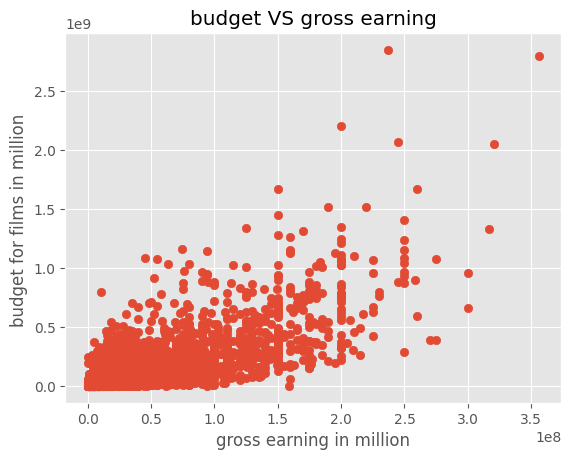

In [40]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget VS gross earning')
plt.xlabel('gross earning in million')
plt.ylabel('budget for films in million ')
plt.show()

plot  budget VS gross using seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

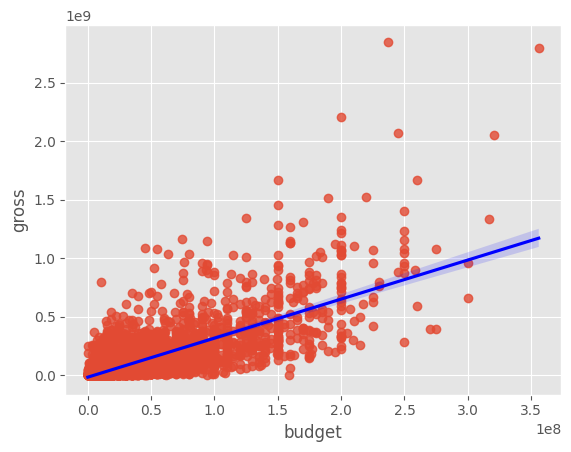

In [41]:
sns.regplot(x='budget',y='gross', data = df,line_kws={"color":"blue"} )

looking at the correlation 

In [42]:
df.corr()   # this show the correlation matrix 

,gross,budget,year,score,votes,runtime
gross,1.000000,0.740247,0.274321,0.222556,0.614751,0.275796
budget,0.740247,1.000000,0.327722,0.072001,0.439675,0.318695
year,0.274321,0.327722,1.000000,0.056386,0.206021,0.075077
score,0.222556,0.072001,0.056386,1.000000,0.474256,0.414068
votes,0.614751,0.439675,0.206021,0.474256,1.000000,0.352303
runtime,0.275796,0.318695,0.075077,0.414068,0.352303,1.000000


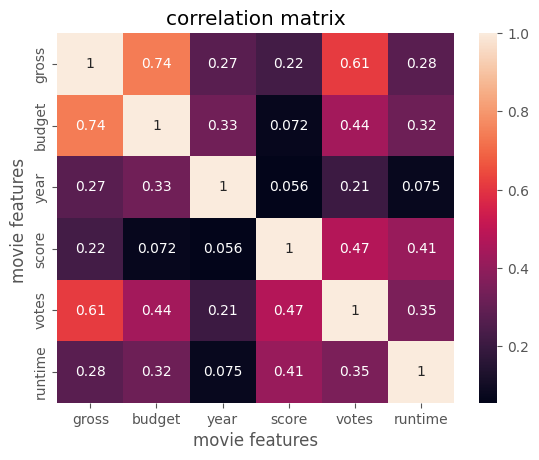

In [43]:
correlation_matrix = df.corr() 

sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation matrix')
plt.xlabel('movie features')
plt.ylabel('movie features ')
plt.show()

convert company cloumn to a numeric representation to add it to our correlation matrix

In [ ]:
df_numerized= df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
     df_numerized[col_name]= df_numerized[col_name].astype('category')
     df_numerized[col_name]= df_numerized[col_name].cat.codes # this for add a random nomarization 
     
df_numerized  



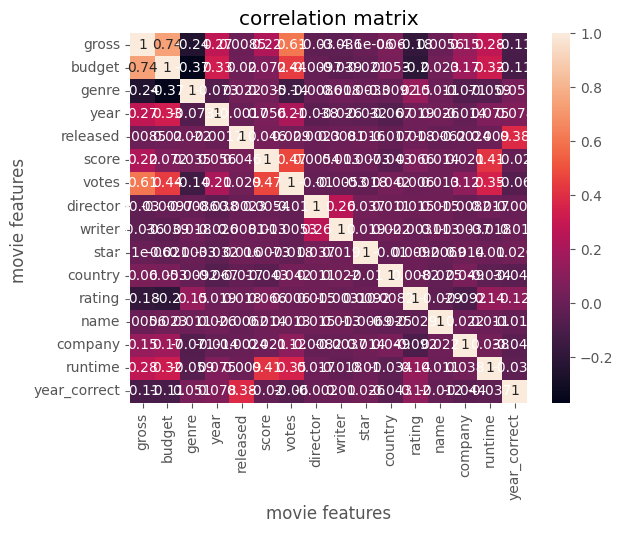

In [45]:
correlation_matrix = df_numerized.corr() 

sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation matrix')
plt.xlabel('movie features')
plt.ylabel('movie features ')
plt.show()

In [ ]:
df_numerized.corr() 
